In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
# Load packages
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans

In [3]:
FILE_PATH = '../data/raw/survey_results_public.csv'
LOAD_PATH = '../data/interim/'
LOAD_SKILLS_DEV = '4.1-preprocessed-data_skills_dev.pkl'
LOAD_HEAT_MAP = '5.0-EDA-heat_map.pkl'

# More preprocessing steps:
1. Drop roles: ['Student', 'Other (please specify):', 'Designer', 'Educator', 'Product manager', 'Marketing or sales professional']
2. split roles: ['Developer_full-stack', 'Developer_back-end']
3. Cluster similar roles

In [4]:
def reduce_dimensions(df):
    tsne_data = pd.DataFrame(TSNE(n_components=2, learning_rate=.01,
                                 perplexity=3, n_iter = 10**10).fit_transform(df),
                 index = df.index)

    return tsne_data

In [227]:
def evaluate_cluster_model(tsne_data, range_clusters=range(1,5), plot = True):
    scores = []
    wcss = []
    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init='auto', random_state=0)
        labels = kmeans.fit_predict(tsne_data)
        wcss.append(kmeans.inertia_)


        score = silhouette_score(tsne_data, labels)
        scores.append(score)


    best_k = np.argmax(scores) + range_clusters[0]
    best_labels = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init='auto', random_state=0).fit_predict(tsne_data)
    best_labels = np.array([f'cluster_{label}' for label in best_labels])

    if plot:
        # silhouette score
        fig = px.line(x= range_clusters, y = scores)
        fig.add_vline(best_k)
        fig.update_layout(height=450, width=900, title='Silhouette Score')
        fig.show()


        # Plot the WCSS values
        plt.plot(range_clusters, wcss)
        plt.title('Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.show()

    return best_k, best_labels

In [228]:
def visualize_chosen_cluster_model(role_type, tsne_data, cluster_labels):
    fig = px.scatter(x=tsne_data[0],
                    y=tsne_data[1],
                    text=tsne_data.index,
                    color=cluster_labels,
                     color_discrete_sequence=px.colors.qualitative.Dark24)
    fig.update_traces(textposition='top center')
    fig.update_layout(height=900, width=1500, title_text=f'Clustering top skills for {role_type}')
    fig.show()

# Load Data

In [229]:
skills_dev_df = pd.read_pickle(LOAD_PATH + LOAD_SKILLS_DEV)
developers_skills = pd.read_pickle(LOAD_PATH + LOAD_HEAT_MAP)

In [230]:
skills_dev_df

Languages                                                           \
            APL  Assembly Bash/Shell         C        C#       C++ COBOL   
2      0.000000  0.000000   0.000000  0.000000  0.078225  0.078225   0.0   
3      0.000000  0.000000   0.000000  0.000000  0.348833  0.000000   0.0   
7      0.002722  0.000000   0.002722  0.005444  0.000000  0.005444   0.0   
9      0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   0.0   
10     0.000000  0.000000   0.074712  0.000000  0.112069  0.000000   0.0   
...         ...       ...        ...       ...       ...       ...   ...   
73262  0.000000  0.002167   0.000000  0.002167  0.000000  0.003250   0.0   
73263  0.000000  0.000000   0.159422  0.000000  0.000000  0.000000   0.0   
73264  0.000000  0.000000   0.034767  0.000000  0.000000  0.000000   0.0   
73265  0.000000  0.000000   0.000000  0.000000  0.085912  0.000000   0.0   
73266  0.000000  0.000000   0.000000  0.000000  0.271340  0.000000   0.0   

                                 ...             DevType  \
      Clojure Crystal      Dart  ... Engineering manager   
2         0.0     0.0  0.000000  ...                   0   
3         0.0     0.0  0.000000  ...                   0   
7         0.0     0.0  0.000000  ...                   0   
9         0.0     0.0  0.000000  ...                   0   
10        0.0     0.0  0.000000  ...                   0   
...       ...     ...       ...  ...                 ...   
73262     0.0     0.0  0.000000  ...                   0   
73263     0.0     0.0  0.106281  ...                   0   
73264     0.0     0.0  0.000000  ...                   0   
73265     0.0     0.0  0.000000  ...                   0   
73266     0.0     0.0  0.000000  ...                   0   

                                                                               \
      Marketing or sales professional Other (please specify): Product manager   
2                                   0                       0               0   
3                                   0                       0               0   
7                                   0                       0               0   
9                                   0                       0               0   
10                                  0                       0               0   
...                               ...                     ...             ...   
73262                               0                       0               0   
73263                               0                       0               0   
73264                               0                       0               0   
73265                               0                       0               0   
73266                               0                       0               0   

                                                       \
      Project manager Scientist Security professional   
2                   0         0                     0   
3                   0         0                     0   
7                   0         0                     0   
9                   0         0                     0   
10                  0         0                     0   
...               ...       ...                   ...   
73262               0         0                     0   
73263               0         0                     0   
73264               0         0                     0   
73265               0         0                     0   
73266               0         0                     0   

                                                                       
      Senior Executive (C-Suite_VP_etc.) Student System administrator  
2                                      0       0                    0  
3                                      0       0                    0  
7                                      0       1                    0  
9                                      0       0                    0  
10      

In [231]:
developers_skills

,Visual Studio Code,Docker,JavaScript,SQL,AWS,HTML/CSS,npm,Python,PostgreSQL,TypeScript,...,Colocation,TextMate,Play Framework,COBOL,OCaml,Uno Platform,Crystal,Flow,SAS,APL
job_type,,,,,,,,,,,,,,,,,,,,,
Developer_full-stack,0.643478,0.332226,1.728091,0.648325,0.242281,1.865029,1.832151,-0.750718,0.462563,1.885592,...,-0.493280,-0.179719,0.350002,-0.695551,-0.330071,-0.216482,0.058709,0.553920,-0.270572,-0.834793
Developer_back-end,0.550099,0.914106,0.496119,0.748761,0.735634,0.197229,0.576055,-0.178736,0.988439,0.552868,...,-0.317469,0.014596,1.161129,0.127976,0.037173,-0.312642,0.427555,-0.417501,-0.332298,-0.691988
Developer_front-end,0.236148,-0.399740,1.432101,-0.549764,-0.415795,1.754327,1.783955,-1.337430,-0.479756,1.949929,...,-0.999980,-0.762550,-0.631086,-0.739608,-0.696566,-0.484214,-0.866534,1.550171,-0.137506,-1.055376
Developer_desktop or enterprise applications,1.072204,-0.116014,0.439195,1.060457,-0.447683,0.611498,0.048091,-0.185279,-0.228375,0.274480,...,-0.597945,-0.563494,-0.321794,2.090686,-0.380184,2.660026,1.370289,-0.266390,-0.478204,-0.135522
Developer_mobile,-0.395971,-1.049828,-0.450053,-1.020856,-0.610251,-0.584926,0.069974,-1.354042,-1.016884,-0.006727,...,-0.893595,1.274784,-0.705614,-0.733896,-1.207540,1.291526,-0.678031,2.157946,-0.559376,-0.888334
Student,-3.279573,-2.229095,-2.637569,-2.265563,-2.117238,-2.577261,-2.193497,-2.210949,-2.152963,-1.828362,...,-1.217601,-1.774108,-1.398888,-1.671400,-1.594260,-1.234213,-1.401607,-1.812963,-0.560996,-1.430756
DevOps specialist,1.266718,1.909046,0.970309,0.767482,1.261948,0.789238,1.103082,0.819004,1.384323,1.024111,...,0.564949,0.675245,0.430476,-0.290197,-0.294740,-0.156091,0.179083,0.554074,-0.425891,-0.351631
Cloud infrastructure engineer,1.458073,2.210924,0.868015,0.618616,2.455382,0.318414,1.025740,1.063354,1.721389,1.314664,...,0.889344,-0.083792,1.201307,0.002524,0.405381,-0.223396,0.636793,0.220895,-0.296076,0.292490
Data scientist or machine learning specialist,0.006104,0.130051,-1.182329,0.204205,0.217920,-1.039415,-1.243492,2.017619,0.041236,-1.208772,...,-0.301037,0.111160,-0.306335,-0.181985,0.159016,-1.044706,-0.734732,-1.327205,3.472358,-0.358396


## 1. Drop roles: ['Student', 'Other (please specify):', 'Designer', 'Educator', 'Product manager', 'Marketing or sales professional']

In [232]:
drop_roles = ['Student',
              'Other (please specify):',
              'Designer', 'Educator',
              'Product manager',
              'Marketing or sales professional']

In [233]:
skills_dev_df = skills_dev_df.drop(drop_roles, axis = 1, level=1)

In [234]:
developers_skills = developers_skills.drop(drop_roles)

## 2. split roles: ['Developer_full-stack', 'Developer_back-end']

In [235]:
split_roles = ['Developer_full-stack', 'Developer_back-end']

In [236]:
def choose_most_related_skills(role_type = 'Developer_full-stack', threshold:float = .4):
    most_related_skills = developers_skills.loc[role_type,:].sort_values(ascending=False)
    most_related_skills = most_related_skills[most_related_skills> threshold].index


    mask = skills_dev_df['DevType'][role_type] == 1
    role_skills = skills_dev_df.loc[mask,: ].drop('DevType', axis = 1, level = 0).droplevel(axis = 1, level = 0)
    role_skills = role_skills.T
    role_skills = role_skills.loc[most_related_skills,:]

    return role_skills

### A) Developer_full-stack

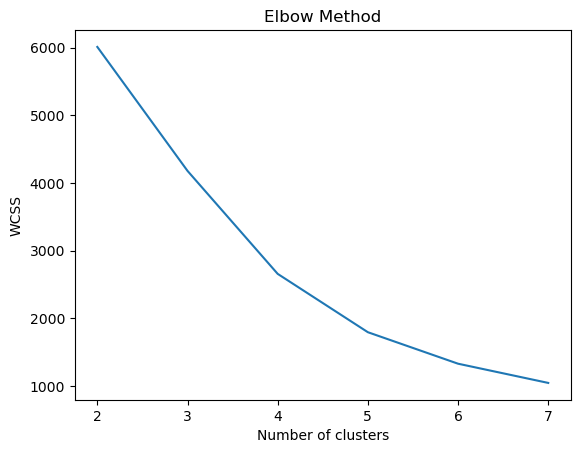

In [243]:
full_stack_skills = choose_most_related_skills(split_roles[0])
full_stack_tsne = reduce_dimensions(full_stack_skills)
best_k, best_labels_full_stack = evaluate_cluster_model(full_stack_tsne, range_clusters=range(2,8), plot = True)
visualize_chosen_cluster_model(split_roles[0], full_stack_tsne, best_labels_full_stack)

In [244]:
for label in sorted(set(best_labels_full_stack)):
    print(label, list(full_stack_tsne[best_labels_full_stack==label].index))


cluster_0 ['ASP.NET', 'Blazor', 'Spring', 'Firebase Realtime Database', 'Rider', 'F#', 'IntelliJ', 'Firebase', 'Java', 'Cloud Firestore']
cluster_1 ['jQuery', 'Laravel', 'PhpStorm', 'Symfony', 'PHP', 'MySQL']
cluster_2 ['Angular', 'React.js', 'Express', 'Angular.js', 'Yarn', 'Node.js', 'Next.js', 'MongoDB', 'Gatsby']
cluster_3 ['Ruby on Rails', 'Phoenix', 'Elixir', 'Ruby', 'Redis', 'PostgreSQL']
cluster_4 ['ASP.NET Core ', 'C#', '.NET', 'Microsoft SQL Server', 'Visual Studio', 'Microsoft Azure']
cluster_5 ['Vue.js', 'Svelte', 'Webstorm', 'Nuxt.js', 'Heroku', 'Deno', 'Electron', 'Fastify', 'React Native', 'Ionic', 'RubyMine', 'Capacitor', 'Cordova', 'DigitalOcean', 'Flow', 'Flutter']
cluster_6 ['TypeScript', 'HTML/CSS', 'npm', 'JavaScript', 'SQL', 'Visual Studio Code']


In [201]:
full_stack_types = ['full_stack_java', 'full_stack_php', 'full_stack_JavaScript', 'full_stack_Ruby-on-Rails', 'full_stack_.NET']

In [278]:
best_labels_full_stack_set = set(best_labels_full_stack)
cluster_5_skills = list(full_stack_tsne[best_labels_full_stack=='cluster_5'].index)
cluster_6_skills = list(full_stack_tsne[best_labels_full_stack=='cluster_6'].index)

best_labels_full_stack_set.remove('cluster_5')
best_labels_full_stack_set.remove('cluster_6')

In [317]:
is_full_stack = skills_dev_df['DevType']['Developer_full-stack'] == 1
print(is_full_stack.sum())
full_stack_roles = {}
for i, label in enumerate(sorted(best_labels_full_stack_set)):
    cluster_labels = list(full_stack_tsne[best_labels_full_stack==label].index)
    if 'JavaScript' in cluster_labels : cluster_labels.remove('JavaScript')
    if 'HTML/CSS' in cluster_labels : cluster_labels.remove('HTML/CSS')
    total_skills = skills_dev_df.droplevel(level=0, axis = 1)[cluster_labels].sum(axis=1)
    is_full_stack_specific_type = total_skills > total_skills.mean()
    print((is_full_stack & is_full_stack_specific_type).sum())
    full_stack_roles[full_stack_types[i]] = is_full_stack & is_full_stack_specific_type

20928
9952
10533
10700
10245
9442


In [318]:
full_stack_roles2 = pd.concat(full_stack_roles, axis = 1)
df = pd.concat([full_stack_roles2,is_full_stack], axis = 1)
df


,full_stack_java,full_stack_php,full_stack_JavaScript,full_stack_Ruby-on-Rails,full_stack_.NET,Developer_full-stack
2,False,False,False,False,False,False
3,True,True,True,True,True,True
7,False,False,False,False,False,True
9,False,False,False,False,False,False
10,False,False,False,False,True,True
...,...,...,...,...,...,...
73262,False,False,False,False,False,False
73263,False,False,False,False,False,False
73264,False,False,False,False,False,False
73265,True,True,True,True,True,True


In [321]:
(df.iloc[df['Developer_full-stack'].values,:5].sum(1) == 1).sum()

1440

### B) Developer_back-end

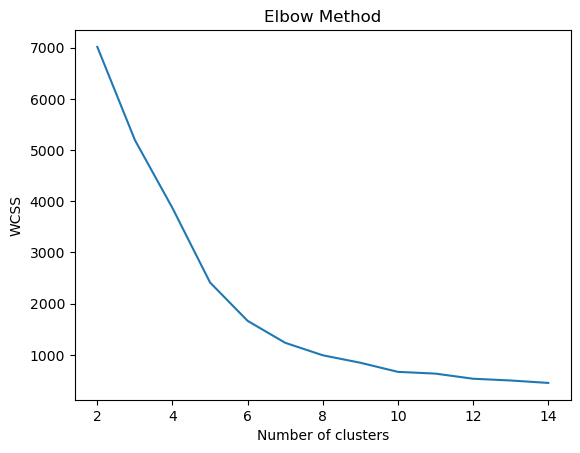

In [326]:
back_end_skills = choose_most_related_skills(split_roles[1], threshold=.4)
back_end_tsne = reduce_dimensions(back_end_skills)
best_k, best_labels = evaluate_cluster_model(back_end_tsne, range_clusters=range(2,15), plot = True)
visualize_chosen_cluster_model(split_roles[1], back_end_tsne, best_labels)

In [327]:
for label in sorted(set(best_labels)):
    print(label, list(back_end_tsne[best_labels==label].index))

cluster_0 ['SQL', 'Angular', 'npm', 'TypeScript', 'Visual Studio Code', 'React.js', 'jQuery', 'Angular.js', 'JavaScript', 'Yarn']
cluster_1 ['Spring', 'IntelliJ', 'Java', 'Kotlin']
cluster_2 ['RubyMine', 'Clojure', 'Play Framework', 'Erlang', 'F#', 'Rider', 'Oracle', 'Heroku', 'IBM DB2', 'DynamoDB', 'Scala', 'Sublime Text', 'Django', 'Groovy', 'Eclipse', 'Express', 'Crystal', 'Neovim', 'Webstorm']
cluster_3 ['PhpStorm', 'Laravel', 'Symfony', 'MySQL', 'PHP', 'MariaDB', 'Vue.js']
cluster_4 ['Apache Kafka', 'MongoDB', 'Redis', 'Cassandra', 'GoLand', 'PostgreSQL', 'Docker', 'Elasticsearch', 'Kubernetes', 'AWS', 'Go']
cluster_5 ['Ruby on Rails', 'Elixir', 'Phoenix', 'Homebrew', 'Ruby']
cluster_6 ['ASP.NET Core ', 'Blazor', 'ASP.NET', '.NET', 'C#', 'Microsoft SQL Server']


# 3. Clustering similar skills

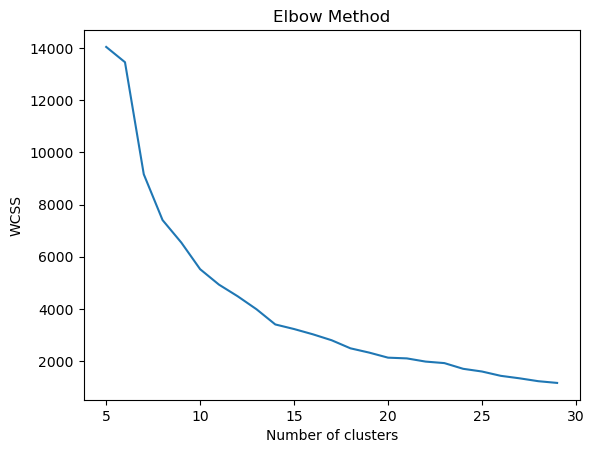

In [290]:
all_skills = skills_dev_df.drop('DevType', axis = 1, level = 0).droplevel(axis = 1, level = 0).T
all_skills_tsne = reduce_dimensions(all_skills)
best_k, best_labels_all_skills = evaluate_cluster_model(all_skills_tsne, range_clusters=range(5,30), plot = True)
visualize_chosen_cluster_model('All roles', all_skills_tsne, best_labels_all_skills)

In [291]:
for label in sorted(set(best_labels_all_skills)):
    print(label, list(all_skills_tsne[best_labels_all_skills==label].index))

cluster_0 ['Cassandra', 'Elasticsearch', 'PostgreSQL', 'Redis', 'Apache Kafka']
cluster_1 ['APL', 'Crystal', 'Fortran', 'Haskell', 'Lua', 'OCaml', 'Heroku', 'IBM Cloud or Watson', 'Linode', 'Managed Hosting', 'OVH', 'GTK', 'Nano', 'Neovim']
cluster_10 ['Go', 'Rust', 'Deno', 'Nuxt.js', 'Svelte', 'Vue.js', 'GoLand']
cluster_11 ['Delphi', 'RAD Studio (Delphi_C++ Builder)']
cluster_12 ['LISP', 'Cloud Firestore', 'Firebase Realtime Database', 'Firebase', 'Google Cloud', 'Emacs']
cluster_13 ['Kotlin', 'Solidity', 'CouchDB', 'Couchbase', 'Colocation', 'DigitalOcean', 'VMware', 'Flow', 'Puppet', 'Atom', 'Sublime Text', 'Webstorm']
cluster_14 ['COBOL', 'F#', 'PowerShell', 'IBM DB2', 'Eclipse', 'NetBeans']
cluster_15 ['Dart', 'Flutter', 'Android Studio']
cluster_16 ['Clojure', 'Erlang', 'Julia', 'MATLAB', 'SAS', 'VBA', 'CLion', 'RubyMine', 'Spyder', 'TextMate']
cluster_17 ['Express', 'Fastify', 'Gatsby', 'Next.js', 'Node.js', 'React.js', 'Yarn']
cluster_18 ['Django', 'Capacitor', 'Cordova', 'Ele